## **Bayes' billiard table** 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adelval1/teaching/Bayes_Billiard.ipynb)

This notebook shows an example of how to compute, with today's powerful algorithms and tools, the very first Bayesian problem that Bayes solved.

There's a billiard table and someone throws a white ball on it at random. The billiard table is hidden from your view. A number of red balls are then thrown at random on to the table, and you are told only how many lay to the left and how many to the right of the white ball. Where do you think the white ball has fallen and what should be your probability of the next red ball falling to left of the white ball?


In [3]:
import pymc3 as pm
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import binom
import seaborn as sns

We are going to infer a parameter which defines the probability of a ball being thrown on a billiard table randomly falling left of another given ball already on the table in an unknown position. This is expressed as a probability parameter $L$, which represents the probability of being successful (throwing a ball that falls left of the white ball) in a binary (right/left) experiment. A ball positioned in the middle would have  half of the thrown balls fall on its left $L = 0.5$.

The statistical model which defines the throwing process is the binomial distribution which expresses the probability of obtainig the data "$P$ balls to the left in $N$ throwings" expressed as: $\mathcal{P}(\mathrm{data} \vert L) = L^{P}(1-L)^{N-P}$. Bayes himself defined flat priors for $L$ as $L \sim \mathcal{U}[0,1]$. You can see how the posterior evolves as more observations come in.

Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 9179.85it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 10238.22it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 6297.44it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


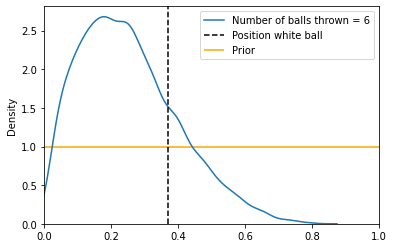

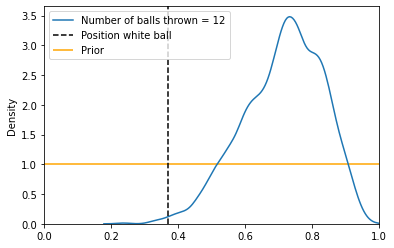

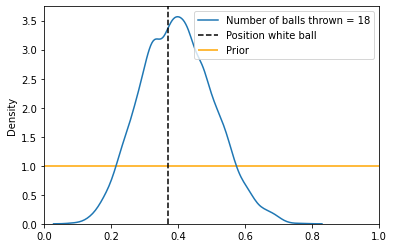

In [5]:
pos_true = 0.37
number_balls_periods = 3

for i in range(number_balls_periods):
  n=6*(i+1)
  X = binom.rvs(n=n, p=pos_true)
    
  with pm.Model():
    r = pm.Uniform('R',lower=0.,upper=1.) # Prior
    y_obs = pm.Binomial('y_obs', p=r, n=n, observed=X) # Likelihood
    step = pm.Metropolis() # MCMC
    trace = pm.sample(10000, step=step, chains=1)
    
  fig=plt.figure()
  sns.kdeplot(trace['R'],label='Number of balls thrown = '+str(n))
  plt.hlines(1.,0.,1.,color='orange',label='Prior')
  plt.axvline(x=0.37,color='black',linestyle='--',label='Position white ball')
  plt.xlim(0.,1.)
  plt.legend(loc='best')

Now we throw many more balls and see how the posterior gets very close and peaky around the value where the white ball is. Indeed, this is a learning process!

Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 9188.78it/s] 
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 10082.84it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 9854.03it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 8143.27it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Sequential sampling (1 chains in 1 job)
Metropolis: [R]
100%|██████████| 10500/10500 [00:01<00:00, 7741.62it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


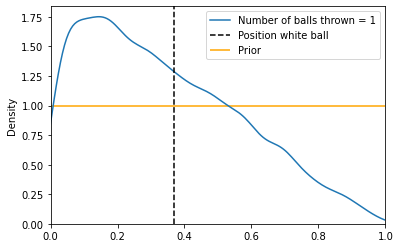

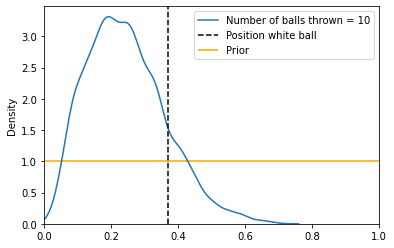

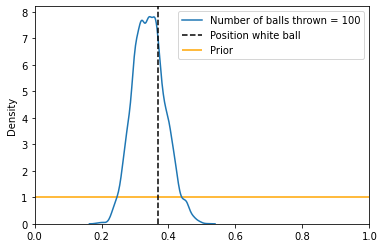

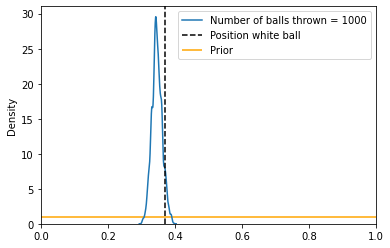

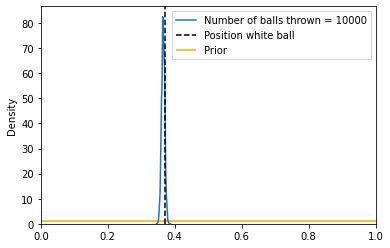

In [6]:
number_balls_periods = 5

for i in range(number_balls_periods):
  n=np.power(10,i)
  X = binom.rvs(n=n, p=pos_true)
    
  with pm.Model():
    r = pm.Uniform('R',lower=0.,upper=1.) # Prior
    y_obs = pm.Binomial('y_obs', p=r, n=n, observed=X) # Likelihood
    step = pm.Metropolis() # MCMC
    trace = pm.sample(10000, step=step, chains=1)
    
  fig=plt.figure()
  sns.kdeplot(trace['R'],label='Number of balls thrown = '+str(n))
  plt.hlines(1.,0.,1.,color='orange',label='Prior')
  plt.axvline(x=0.37,color='black',linestyle='--',label='Position white ball')
  plt.xlim(0.,1.)
  plt.legend(loc='best')